# 1, 2. 

On commence par importer les packages nécessaires 

In [17]:
import numpy as np
import matplotlib.pyplot as plt 

On défini les constantes et les coefficients a1, a2, b1, b2. 

In [18]:
# Definition of constants
M = 9.109e-31  # mass of electron (g)
L = 1e-8  #length of box (m)
h_bar = 6.626e-34 #Planck constant (J⋅s)

N = 1000  # number of spacial steps
a = L / N  # spacial step size

h = 1e-18 # temporal step (s)
tf = 1e-16 #final time (s)
t_step = int(tf/h) #number of temporal steps

#Intialisation of coefficients
const = h * (1j *  h_bar) / (2 * M * a ** 2) 
a1 = 1 + const
a2 = -const/2
b1 = 1 - const
b2 = const/2

On ajoute les fonctions. La fonction psi0 défini la valeur de $\psi$(x,0), la fonction banded provient de l'annexe E du livre et permet le calcul de matrices tridiagonales

In [19]:
def psi0(x):
    #Defining constants
    x_0 = L/2 #inital position
    s = 1e-10  # sigma (m)
    k = 5e10  # kappa (m**-1)
    
    return np.exp(-(x - x_0) ** 2 / (2 * s ** 2)) * np.exp(1j * k * x)

def banded(Aa,va,up,down):

    # Copy the inputs and determine the size of the system
    A = np.copy(Aa)
    v = np.copy(va)
    N = len(v)

    # Gaussian elimination
    for m in range(N):

        # Normalization factor
        div = A[up,m]

        # Update the vector first
        v[m] /= div
        for k in range(1,down+1):
            if m+k<N:
                v[m+k] -= A[up+k,m]*v[m]

        # Now normalize the pivot row of A and subtract from lower ones
        for i in range(up):
            j = m + up - i
            if j<N:
                A[i,j] /= div
                for k in range(1,down+1):
                    A[i+k,j] -= A[up+k,m]*A[i,j]

    # Backsubstitution
    for m in range(N-2,-1,-1):
        for i in range(up):
            j = m + up - i
            if j<N:
                v[m] -= A[i,j]*v[j]

    return v

On crée le vecteur $\psi$(t) ainsi que la matrice A

In [20]:
# initial conditions
x_points = np.linspace(0, L, N + 1)

#initailisation of psi(t) vector
psi = np.zeros(N+1, complex)
psi[:] = psi0(x_points) #setting all elements to psi(x,0)
psi[0], psi[N] = 0, 0 #limit conditions at x = 0 and x = L

A = np.empty((3,N),complex)
A[0,:] = a2
A[1,:] = a1
A[2:,] = a2

Finalement on peut calculer $v_i$ et $\psi_{i}$, les deux sont calculés en mêmes temps puisque $\psi$ dépend de $v_i$ (PEUT ÊTRE FAUX!!!!!!). Le calcul est fait à chaque h jusqu'au temps final choisi

In [21]:
for i in range(t_step):
    v = b1*psi[1:N] + b2*(psi[2:N+1] + psi[0:N-1])
    psi[1:N] = banded(A, v, 1, 1)

# 3. 
Je sais pas pourquoi il fait ça

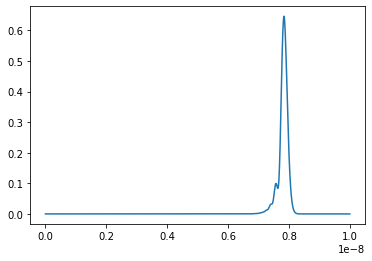

In [23]:
plt.plot(x_points, abs(psi**2))
plt.show()